In [2]:
import cv2 as cv
import numpy as np
import dlib
import matplotlib.pyplot as plt

from scipy.spatial import distance as dist
import math
import time
from io import BytesIO
from IPython.display import clear_output, Image, display
from PIL import Image as Img

# O primeiro desafio é criar um algoritimo que indentifique mais de um rosto nas fotos, ou nenhum.
# Se não identificar nenhum rosto ou apenas um vou usar outro detector de rosto.
# Depois irei fazer uma rotina para separa o rosto da foto, e só ai irei tentar adivinhar a idade com um algoritimo já treinado.


In [4]:
#classificador = cv2.CascadeClassifier('C:\\Users\\renan\\anaconda3\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')
classificador = cv.CascadeClassifier('classificadores/haarcascade_frontalface_default.xml')

In [24]:
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)

faceProto = "classificadores/opencv_face_detector.pbtxt"
faceModel = "classificadores/opencv_face_detector_uint8.pb"
ageList = [ '(0-2)', '(3-9)', '(10-19)', '(20-29)', '(30-39)', '(40-49)', '(50-59)','(60-69)','(70-100)']
ageProto = "classificadores/age_deploy.prototxt"
ageModel = "classificadores/age_net.caffemodel"
ageNet=cv.dnn.readNet(ageModel,ageProto)

In [25]:

classificador_dlib_68_path = "classificadores/shape_predictor_68_face_landmarks.dat"
classificador_dlib = dlib.shape_predictor(classificador_dlib_68_path)
detector_face = dlib.get_frontal_face_detector()


In [26]:
def faces_imagem(imagem_gray):
    faces = classificador.detectMultiScale(imagem_gray, 1.3, 5)
    return len(faces)


def anotar_rosto(imagem):
    retangulos = detector_face(imagem, 1)
    
    if len(retangulos) == 0:
        return imagem, 0
    
    for k, d in enumerate(retangulos):
        print("Identificado rosto " + str(k))
        cv.rectangle(imagem, (d.left(), d.top()), (d.right(), d.bottom()), (255, 255, 0), 2)
        x=int(d.left())
        y=int(d.top())
        w=int(d.right())
        h=int(d.bottom())
        face=imagem[y:h,x:w]
        blob = cv.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=True)
        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]
    return face, age


def age_detector(imagem):
    #imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)
    n_face= faces_imagem(imagem)
    if n_face ==1: 
        face, age = anotar_rosto(imagem)
        return age 
    if n_face==0:
        face, age= anotar_rosto(imagem)
        return age
    else:
        return n_face
    

# agora alguns testes para saber se esta funcionando...

Identificado rosto 0
(30-39)


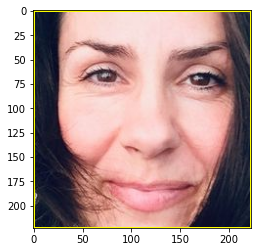

In [34]:
imagem = cv.imread("dataset/40-49/6 (39).jpg")
imagem = cv.cvtColor(imagem, cv.COLOR_BGR2RGB)
output, age = anotar_rosto(imagem)
plt.imshow(output)
print(age)

Identificado rosto 0
(0-2)


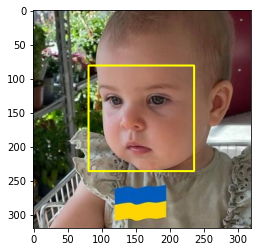

In [35]:
imagem = cv.imread("dataset/00-02/1 (1).jpg")
imagem = cv.cvtColor(imagem, cv.COLOR_BGR2RGB)
age = age_detector(imagem)
plt.imshow(imagem)
print(age)

Identificado rosto 0
(30-39)


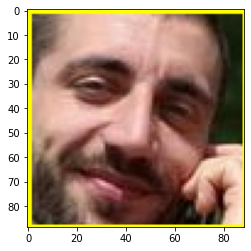

In [42]:
imagem = cv.imread("dataset/30-39/5 (63).jpg")
imagem = cv.cvtColor(imagem, cv.COLOR_BGR2RGB)
output, age = anotar_rosto(imagem)
plt.imshow(output)
print(age)

Identificado rosto 0
(30-39)


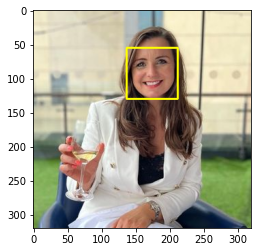

In [41]:
imagem = cv.imread("dataset/30-39/5 (81).jpg")
imagem = cv.cvtColor(imagem, cv.COLOR_BGR2RGB)
age = age_detector(imagem)
plt.imshow(imagem)
print(age)

# Parece ok, vou aplicar agora ao dataset, fiz uma mudança nos nomes do dataset, assim fica mais fácil de fazer o código.

In [43]:
from os import listdir, path, makedirs
from os.path import isfile, join
import shutil

caminho = ["dataset/00-02","dataset/03-09","dataset/10-19","dataset/20-29","dataset/30-39","dataset/40-49","dataset/50-59","dataset/60-69","dataset/70100"]

In [44]:
data=[]
for i in caminho:
    u=[f for f in listdir(i) if isfile(join(i,f))]
    data.append(u)

In [45]:
data[0]

['1 (1).jpg', '1 (2).jpg', '1 (3).jpg', '1 (4).jpg']

In [46]:
import pandas as pd

In [47]:
df1 = pd.DataFrame(data[0])
df1[1]='00-02'
df2 = pd.DataFrame(data[1])
df2[1]='03-09'
df3 = pd.DataFrame(data[2])
df3[1]='10-19'
df4 = pd.DataFrame(data[3])
df4[1]='20-29'
df5 = pd.DataFrame(data[4])
df5[1]='30-39'
df6 = pd.DataFrame(data[5])
df6[1]='40-49'
df7 = pd.DataFrame(data[6])
df7[1]='50-59'
df8 = pd.DataFrame(data[7])
df8[1]='60-69'
df9 = pd.DataFrame(data[8])
df9[1]='70100'

In [48]:
m = pd.merge(df1, df2, how = 'outer')
df=[df3,df4,df5,df6,df7,df8,df9]
for i in df:
    m = pd.merge(m, i , how = 'outer')

In [49]:
classificador_dlib_68_path = "classificadores/shape_predictor_68_face_landmarks.dat"
classificador_dlib = dlib.shape_predictor(classificador_dlib_68_path)
detector_face = dlib.get_frontal_face_detector()

def faces_imagem(imagem_gray):
    faces = classificador.detectMultiScale(imagem_gray, 1.3, 5)
    return len(faces)


def anotar_rosto(imagem):
    retangulos = detector_face(imagem, 1)
    
    if len(retangulos) == 0:
        return  0
    
    for k, d in enumerate(retangulos):
        #print("Identificado rosto " + str(k))
        cv.rectangle(imagem, (d.left(), d.top()), (d.right(), d.bottom()), (255, 255, 0), 2)
        x=int(d.left())
        y=int(d.top())
        w=int(d.right())
        h=int(d.bottom())
        face=imagem[y:h,x:w]
        try:
            blob = cv.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=True)
        except:
            return 'error'          
        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]
    return age


def age_detector(imagem):
    #imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)
    n_face= faces_imagem(imagem)
    if n_face ==1: 
        age = anotar_rosto(imagem)
        return age 
    if n_face==0:
        age= anotar_rosto(imagem)
        return age
    else:
        return n_face

# Fiz uma pequena mudança na rotina para retornar apenas as idades, irei comparar com as pastas assim ver se a idade bate com a foto da pasta.

In [50]:
dados=None
dados=[]
pasta=[]
idade=[]
n_faces=[]
erros=[]
for i in caminho:
    u=[f for f in listdir(i) if isfile(join(i,f))]
    for j, arq in enumerate(u):
        imagem_path = i + '/'+arq
        imagem = cv.imread(imagem_path)
        imagem = cv.cvtColor(imagem, cv.COLOR_BGR2RGB)
        dados.append(imagem)
        dados_idade=str(age_detector(imagem))
        idade.append(str(dados_idade))
        pasta.append(str(i[-5:]))

In [51]:
# idade=[]
# for i in dados:
#     dados_idade=age_detector(i)
#     idade.append(str(dados_idade))

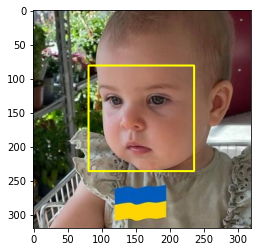

In [52]:
plt.imshow(dados[0])

In [53]:
idade=[]
for i in dados:
    dados_idade=age_detector(i)
    idade.append(str(dados_idade))

# aqui vou fazer um dataframe com o nome das pastas e a idade que consegui, lembrando que a saida pode ser de três tipos: idade, erro ou quantidade de pessoas na foto. Se a quantidade de pessoas for maior que 1 irei descartar a foto.

In [54]:
d = {'pasta': pasta, 'idade': idade}

In [55]:
datas1 = pd.DataFrame(d)
datas1

,pasta,idade
0,00-02,(0-2)
1,00-02,(3-9)
2,00-02,0
3,00-02,(3-9)
4,03-09,0
...,...,...
522,70100,0
523,70100,0
524,70100,(30-39)
525,70100,2


In [56]:
m.columns = ['arq','pasta']

In [57]:
print(m.pasta.unique())
print(datas1.pasta.unique())

['00-02' '03-09' '10-19' '20-29' '30-39' '40-49' '50-59' '60-69' '70100']
['00-02' '03-09' '10-19' '20-29' '30-39' '40-49' '50-59' '60-69' '70100']


In [58]:
#DataF=pd.merge(m,datas1, how='outer', on ='pasta')
dataf1 = m.copy(deep=True)
dataf2 = datas1.copy(deep=True)

In [59]:
dataf2.head()

,pasta,idade
0,00-02,(0-2)
1,00-02,(3-9)
2,00-02,0
3,00-02,(3-9)
4,03-09,0


In [60]:
dataf2.pasta.unique()

array(['00-02', '03-09', '10-19', '20-29', '30-39', '40-49', '50-59',
       '60-69', '70100'], dtype=object)

In [61]:
faixa_idade = {
    '00-02' : '(0-2)' ,
    '03-09' : '(3-9)' ,
    '10-19' : '(10-19)' ,
    '20-29' : '(20-29)' ,
    '30-39' : '(30-39)' ,
    '40-49' : '(40-49)' ,
    '50-59' : '(50-59)' , 
    '60-69' : '(60-69)' ,
    '70100' : '(70-100)' ,
}

In [62]:
dataf2.pasta = dataf2.pasta.map(faixa_idade)

In [63]:
dataf2['resultado'] = dataf2.pasta==dataf2.idade


In [64]:
dataf2.replace({False: 0, True: 1}, inplace=True)
dataf2

,pasta,idade,resultado
0,(0-2),(0-2),1
1,(0-2),(3-9),0
2,(0-2),0,0
3,(0-2),(3-9),0
4,(3-9),0,0
...,...,...,...
522,(70-100),0,0
523,(70-100),0,0
524,(70-100),(30-39),0
525,(70-100),2,0


# Com o dataframe pronto irei calcular os resultados, se a foto corresponder a pasta correta com a idade correta, é um acerto, caso contrario um erro.

In [65]:
dataf2.groupby(dataf2.idade).sum()

,resultado
idade,
(0-2),1
(10-19),1
(20-29),5
(3-9),2
(30-39),24
(40-49),3
(50-59),0
(60-69),0
0,0


In [66]:
dataf2.idade.value_counts()

0          267
(30-39)     97
(10-19)     39
(3-9)       31
(0-2)       22
2           20
(50-59)     15
(40-49)     15
(20-29)      9
error        6
3            3
(60-69)      3
Name: idade, dtype: int64

# Aqui irei calcular os resultados que foram de fato computados, pois como tem fotos que o algoritimo não consegue identificar um rosto, tem mais de uma pessoa na foto ou da erro. Para todos os casos irei consideralos não computados e retirar to total de fotos.

In [72]:
não_identificados=267
mais_pessoas=20+3
erros=6
total_não_computavel=não_identificados+ mais_pessoas+erros

In [73]:
total_amostras=526
total_computavel= total_amostras-total_não_computavel

In [74]:
total_acertos=dataf2.resultado.sum()

In [75]:
indice_acerto=total_acertos/total_computavel
indice_acerto

0.1565217391304348

# O indice de acerto geral, foi bem baixo 15% mas daria para melhora-lo com tempo.

In [77]:
indice_acerto_idade_30_39=28/114
indice_acerto_idade_30_39

0.24561403508771928

# O indice de das fotos entre 30-39 anos, foi um pouco melhor, cerca de 24% mas daria para melhora-lo com tempo também.